In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [44]:
df = pd.read_csv("21-housing.csv")

In [45]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [47]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [48]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [49]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [50]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

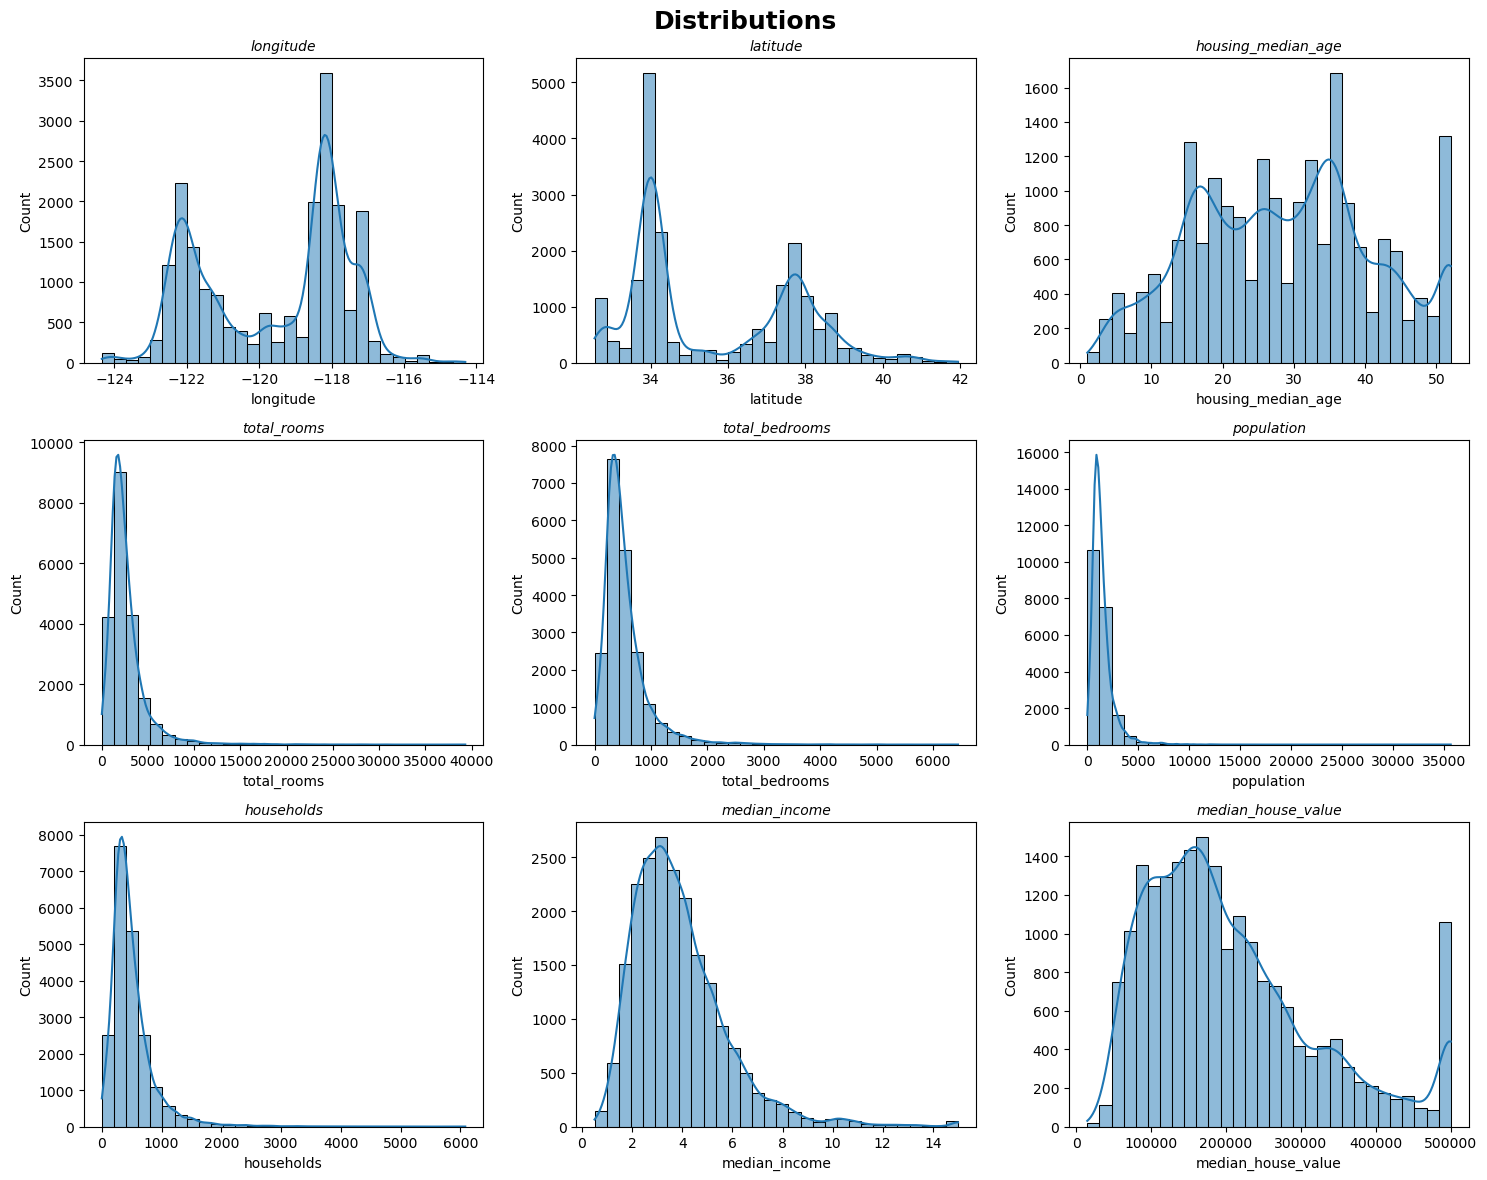

In [51]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(15,12))
fig.suptitle("Distributions", fontsize = 18, fontweight = "bold")

for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    sns.histplot(data = df, x = col, kde=True, ax=ax, bins=30)
    ax.set_title(col, fontsize=10, fontstyle = "italic")

plt.tight_layout()
plt.show()

In [52]:
def find_outliers_iqr(df, threshold = 1.5):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[ (df[col] < lower_bound) | (df[col] > upper_bound)]
        
        outlier_summary[col] = {
            "outlier_count" : outliers.shape[0],
            "outlier_percentage" : 100 * outliers.shape[0] / df.shape[0],
            "lower_bound" : lower_bound,
            "upper_bound" : upper_bound
        }
    return pd.DataFrame(outlier_summary)

In [53]:
find_outliers_iqr(df, threshold = 1.5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
outlier_count,0.000,0.00,0.0,1287.000000,1271.000000,1196.000000,1220.000000,681.000000,1071.000000
outlier_percentage,0.000,0.00,0.0,6.235465,6.157946,5.794574,5.910853,3.299419,5.188953
lower_bound,-127.485,28.26,-10.5,-1102.625000,-230.500000,-620.000000,-207.500000,-0.706375,-98087.500000
upper_bound,-112.325,43.38,65.5,5698.375000,1173.500000,3132.000000,1092.500000,8.013025,482412.500000


In [54]:
def remove_outliers_from_column(df,target_col, threshold = 1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[ (df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [55]:
def remove_outliers_from_all_columns(df, threshold = 1.5):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean.copy()

In [56]:
print("original data shape: ", df.shape)
df_target_clean = remove_outliers_from_column(df, "median_house_value")
print("only target column cleaning shape: ", df_target_clean.shape)
df_all_clean = remove_outliers_from_all_columns(df)
print("all columns cleaning shape: ", df_all_clean.shape)

original data shape:  (20640, 10)
only target column cleaning shape:  (19569, 10)
all columns cleaning shape:  (17446, 10)


In [57]:
df_target_clean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [58]:
df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())

In [59]:
df_target_clean["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     8552
INLAND        6519
NEAR OCEAN    2419
NEAR BAY      2074
ISLAND           5
Name: count, dtype: int64

In [60]:
df_target_clean = pd.get_dummies(df_target_clean, columns=["ocean_proximity"], drop_first=True)

In [61]:
df_target_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [62]:
df_target_clean["total_bedrooms"].unique()

array([ 129., 1106.,  190., ..., 3008., 1857., 1052.])

In [63]:
from scipy.stats import skew

In [64]:
numeric_df = df.select_dtypes(include='number')
skews = numeric_df.apply(skew).sort_values(ascending=False)
print(skews)

population            4.935500
total_rooms           4.147042
households            3.410190
median_income         1.646537
median_house_value    0.977692
latitude              0.465919
housing_median_age    0.060326
longitude            -0.297780
total_bedrooms             NaN
dtype: float64


In [65]:
X = df_target_clean.drop("median_house_value", axis = 1)
y = df_target_clean["median_house_value"]

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [67]:
from sklearn.preprocessing import PowerTransformer

In [68]:
pt_X = PowerTransformer(method="yeo-johnson")

X_train_transformed = pt_X.fit_transform(X_train)
X_test_transformed = pt_X.transform(X_test)

In [69]:
df_target_clean.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [70]:
columns_names=X_train.columns

In [71]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = columns_names)

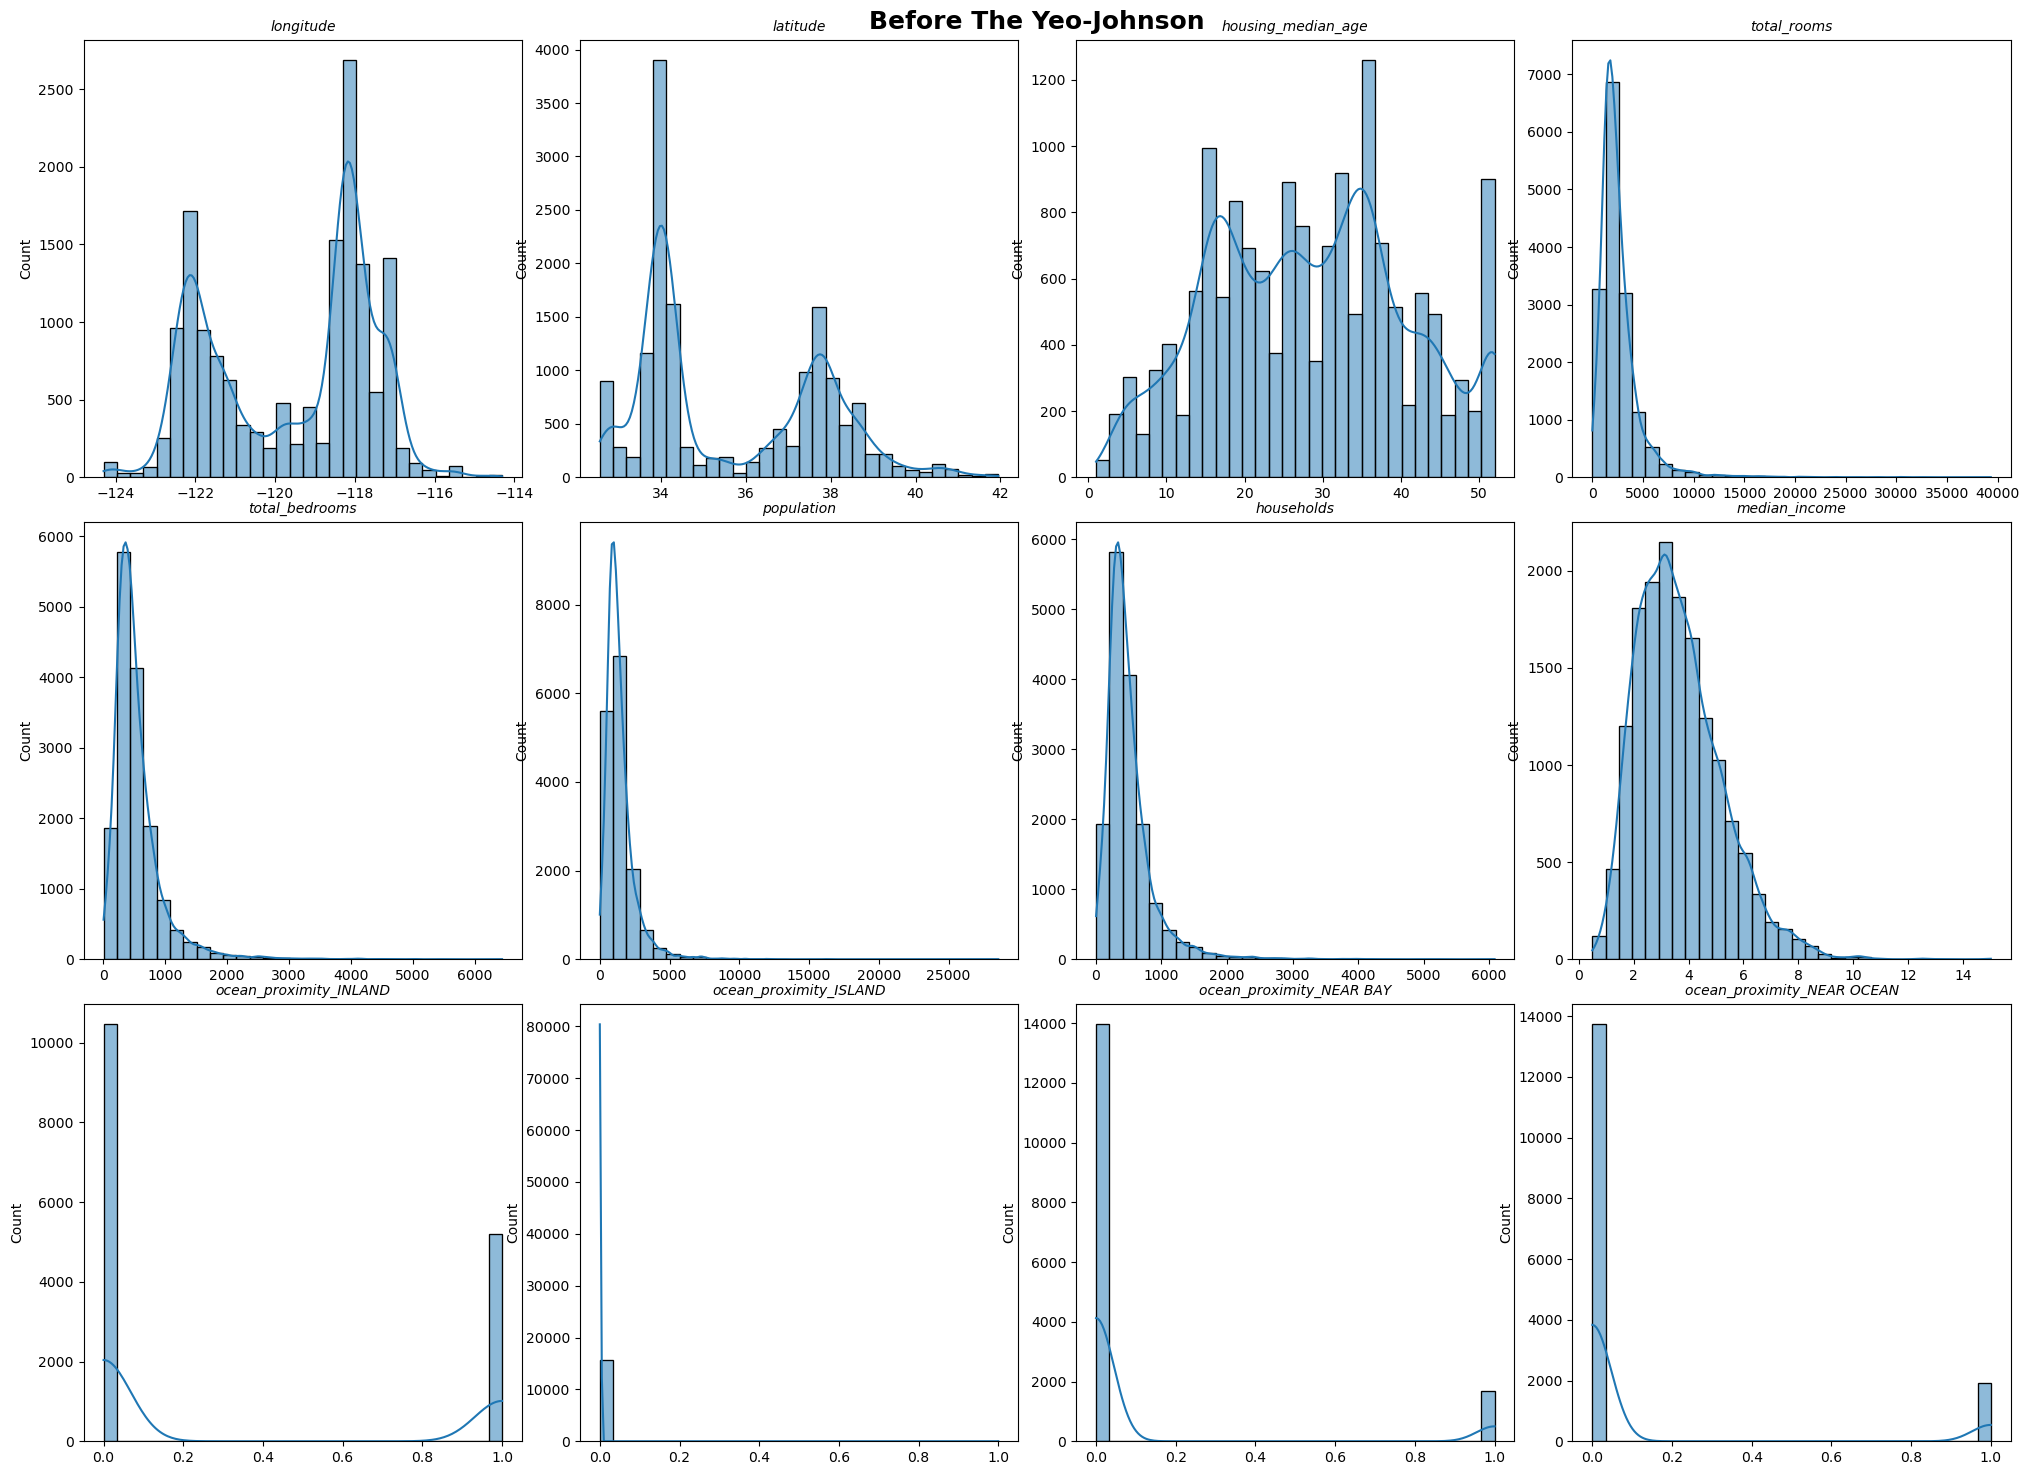

In [72]:
columns_to_plot = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                   'total_bedrooms', 'population', 'households', 'median_income',
                   'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
                   'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
fig.suptitle("Before The Yeo-Johnson", fontsize=18, fontweight="bold")
fig.tight_layout()

for i, col in enumerate(columns_to_plot):
    row = i // 4
    col_idx = i % 4
    ax = axes[row, col_idx]
    sns.histplot(data=X_train, x=col, kde=True, ax=ax, bins=30)
    ax.set_title(col, fontsize=10, fontstyle="italic")
    ax.set_xlabel("")

for j in range(len(columns_to_plot),12):
    row = j // 4
    col_idx = j % 4
    axes[row, col_idx].axis('off')

plt.show()

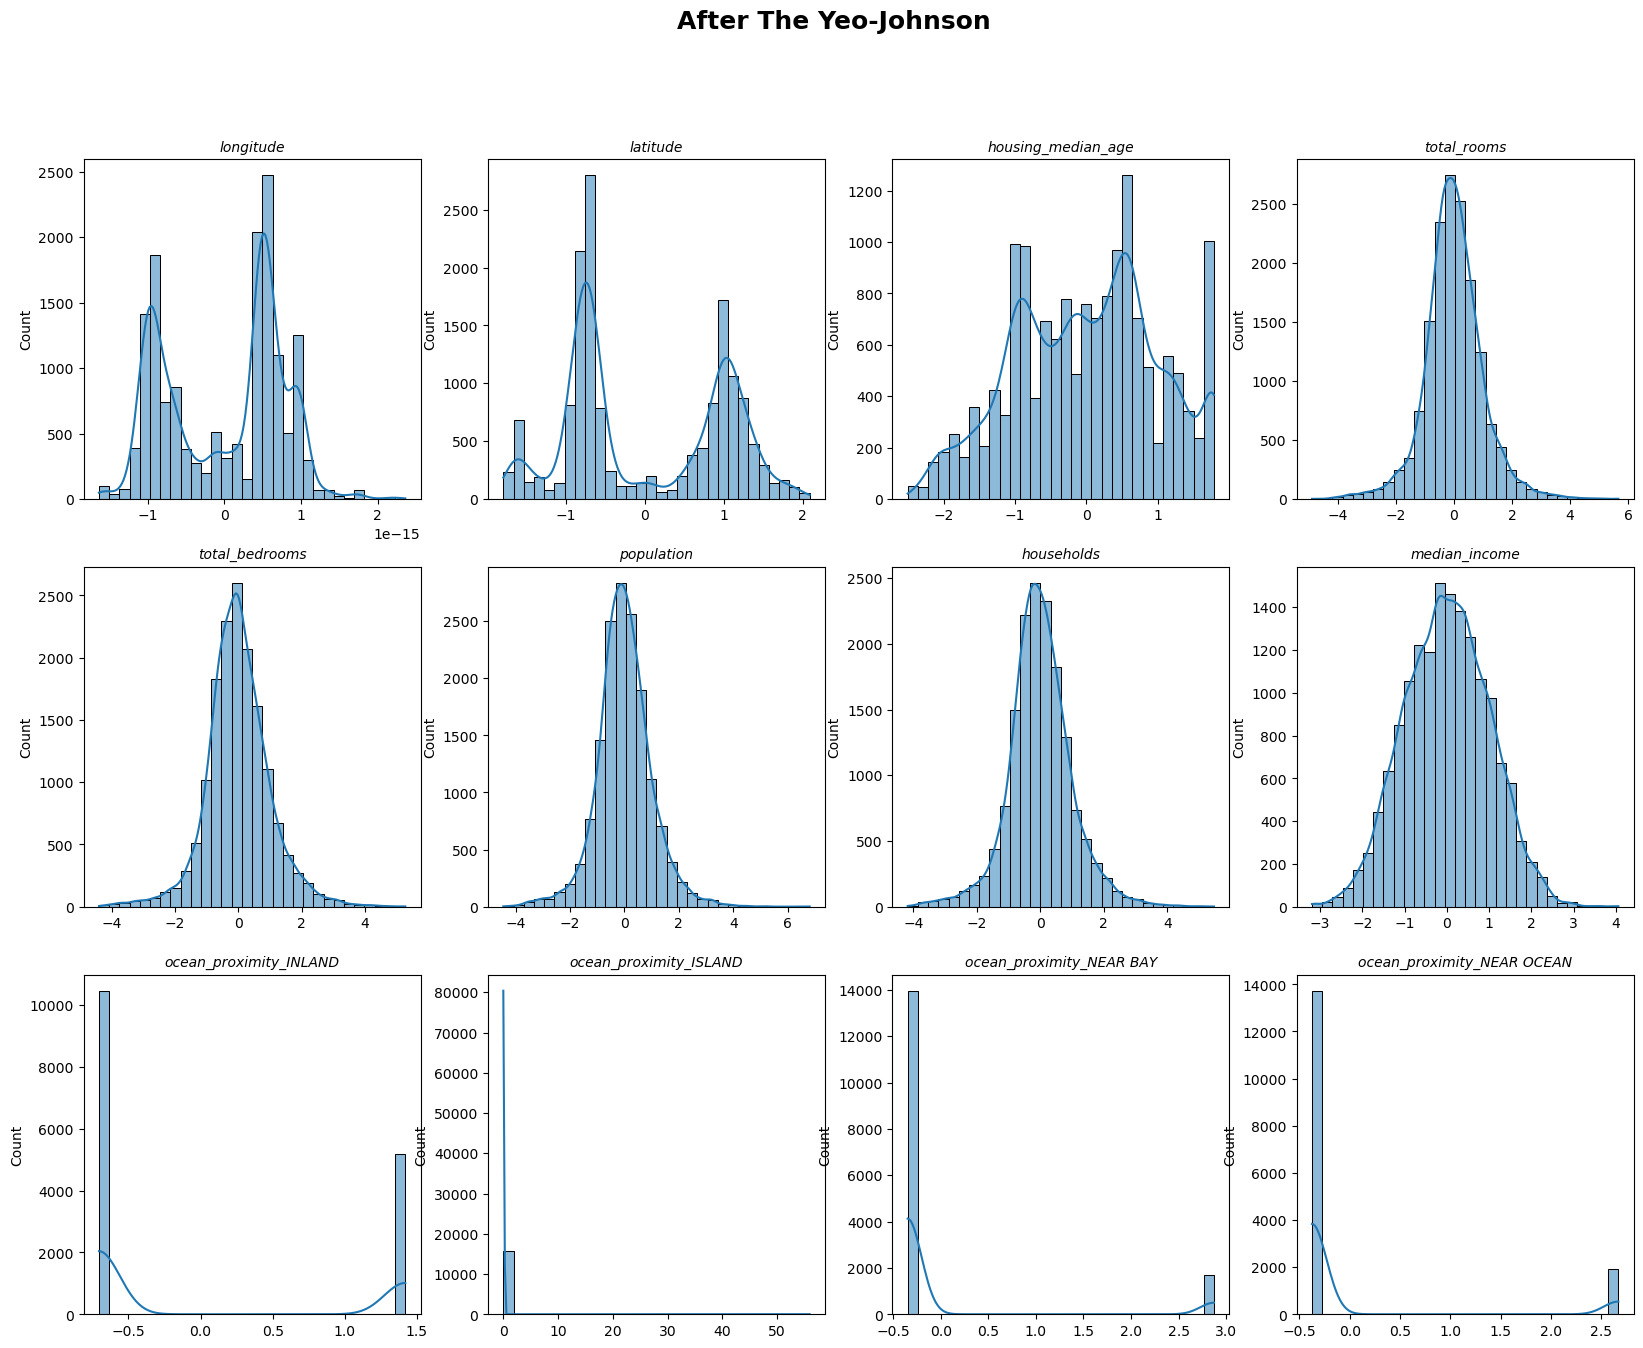

In [73]:
columns_to_plot = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                   'total_bedrooms', 'population', 'households', 'median_income',
                   'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
                   'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
fig.suptitle("After The Yeo-Johnson", fontsize=18, fontweight="bold")
fig.tight_layout

for i, col in enumerate(columns_to_plot):
    row = i // 4
    col_idx = i % 4
    ax = axes[row, col_idx]
    sns.histplot(data=X_train_transformed_df, x=col, kde=True, ax=ax, bins=30)
    ax.set_title(col, fontsize=10, fontstyle="italic")
    ax.set_xlabel("")


for j in range(len(columns_to_plot), 12):
    row = j // 4
    col_idx = j % 4
    axes[row, col_idx].axis('off')

plt.show()

In [74]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_transformed_df,y_train)

LinearRegression()

In [75]:
from sklearn.metrics import r2_score, mean_squared_error

In [76]:
X_test_transformed=pt_X.transform(X_test)
X_test_transformed_df=pd.DataFrame(X_test_transformed,columns=X_test.columns)

In [77]:
y_pred=model.predict(X_test_transformed_df)

In [78]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Skoru: {r2}")
print(f"RMSE: {rmse}")

R2 Skoru: 0.6082872428597845
RMSE: 60188.361947656966


In [79]:
df_target_clean['rooms_per_household'] = df_target_clean['total_rooms'] / df_target_clean['households']
df_target_clean['bedrooms_per_room'] = df_target_clean['total_bedrooms'] / df_target_clean['total_rooms']
df_target_clean['population_per_household'] = df_target_clean['population'] / df_target_clean['households']
df_target_clean = df_target_clean.drop(columns=['total_rooms', 'total_bedrooms', 'population', 'households'])


In [80]:
X = df_target_clean.drop("median_house_value", axis=1)
y = df_target_clean["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pt_X = PowerTransformer(method="yeo-johnson")
X_train_transformed = pt_X.fit_transform(X_train)
X_test_transformed = pt_X.transform(X_test)

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=X_test.columns)

model = LinearRegression()
model.fit(X_train_transformed_df, y_train)

y_pred = model.predict(X_test_transformed_df)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Skoru: {r2}")
print(f"RMSE: {rmse}")

R2 Skoru: 0.6122635626860761
RMSE: 59882.09334050508


In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_transformed_df, y_train)

RandomForestRegressor(random_state=42)

In [83]:
y_pred_rf = rf_model.predict(X_test_transformed_df)
r2_score = r2_score(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [85]:
print(f"R2 Skoru: {r2_score}")
print(f"RMSE: {rmse}")

R2 Skoru: 0.7905369290525489
RMSE: 44013.14467202852


In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
params = {
    "n_estimators": [50, 100, 200],     
    "max_depth": [5, 10, None],      
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf":[0.001,0.01,1],
    "criterion":["squared_error", "absolute_error", "friedman_mse", "poisson"]
}

In [91]:
randomcv=RandomizedSearchCV(estimator=rf_model,param_distributions=params,cv=5,n_jobs=-1,verbose=1)

In [92]:
randomcv.fit(X_train_transformed_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [5, 10, None],
                                        'min_samples_leaf': [0.001, 0.01, 1],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   verbose=1)

In [100]:
randomcv.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': None,
 'criterion': 'absolute_error'}

In [96]:
best_rf_model = randomcv.best_estimator_
best_rf_model

RandomForestRegressor(criterion='absolute_error', min_samples_split=5,
                      n_estimators=50, random_state=42)

In [99]:
from sklearn.metrics import r2_score, mean_squared_error


y_pred_cv = best_rf_model.predict(X_test_transformed_df)
r2_cv = r2_score(y_test, y_pred_cv)
rmse_cv = np.sqrt(mean_squared_error(y_test, y_pred_cv))

print(f"R2 Skoru: {r2_cv}")
print(f"RMSE: {rmse_cv}")

R2 Skoru: 0.7930932879800564
RMSE: 43743.74445340474


In [101]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_transformed_df, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [102]:
y_pred_xgb = xgb_model.predict(X_test_transformed_df)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

In [103]:
print(f"R2 Skoru: {r2_xgb}")
print(f"RMSE: {rmse_xgb}")

R2 Skoru: 0.8107887809995958
RMSE: 41831.37190419239


In [105]:
xgb_reg = xgb.XGBRegressor(random_state=42)

In [104]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [106]:
randomcv_xgb = RandomizedSearchCV(estimator=xgb_reg, param_distributions=params, n_iter=50, cv=5, scoring='r2', n_jobs=-1, verbose=2, random_state=42)

In [107]:
randomcv_xgb.fit(X_train_transformed_df, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='r2', verbose=2)

In [108]:
best_xgb_model = randomcv_xgb.best_estimator_
y_pred_tuned_xgb = best_xgb_model.predict(X_test_transformed_df)
r2_tuned_xgb = r2_score(y_test, y_pred_tuned_xgb)
rmse_tuned_xgb = np.sqrt(mean_squared_error(y_test, y_pred_tuned_xgb))

In [109]:
print(f"R2 Skoru: {r2_tuned_xgb}")
print(f"RMSE: {rmse_tuned_xgb}")

R2 Skoru: 0.8264062749875749
RMSE: 40067.816609871334
